In [1]:
# 0 - Install wget

!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=72e79c46a0561a04685e0bcf445e03de6e1aa92fdc004d34fa773a218bd0000f
  Stored in directory: /root/.cache/pip/wheels/01/46/3b/e29ffbe4ebe614ff224bad40fc6a5773a67a163251585a13a9
Successfully built wget


In [2]:
# 1.1 Downloading the data from the PyTorch website

import wget
wget.download('https://download.pytorch.org/tutorial/data.zip')

'data.zip'

In [3]:
# 1.2 Unzipping the data

!unzip data.zip

Archive:  data.zip
   creating: data/
  inflating: data/eng-fra.txt        
   creating: data/names/
  inflating: data/names/Arabic.txt   
  inflating: data/names/Chinese.txt  
  inflating: data/names/Czech.txt    
  inflating: data/names/Dutch.txt    
  inflating: data/names/English.txt  
  inflating: data/names/French.txt   
  inflating: data/names/German.txt   
  inflating: data/names/Greek.txt    
  inflating: data/names/Irish.txt    
  inflating: data/names/Italian.txt  
  inflating: data/names/Japanese.txt  
  inflating: data/names/Korean.txt   
  inflating: data/names/Polish.txt   
  inflating: data/names/Portuguese.txt  
  inflating: data/names/Russian.txt  
  inflating: data/names/Scottish.txt  
  inflating: data/names/Spanish.txt  
  inflating: data/names/Vietnamese.txt  


In [17]:
# 1.3 Reading the data files

"""
This code is just reading the data and converting it to ASCII.
"""

from io import open
import glob
import os

def findFiles(path): return glob.glob(path)

print(findFiles('data/names/*.txt'))

import unicodedata
import string

all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

"""
'unicodeToAscii' converts a Unicode string to plain ASCII.
ASCII is only a small subset of Unicode, so we can only convert a subset of characters to ASCII.
"""

def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

print(unicodeToAscii('Ślusàrski'))

# Build the category_lines dictionary, a list of names per language
category_lines = {}
all_categories = []

# Read a file and split into lines
def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

for filename in findFiles('data/names/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

n_categories = len(all_categories)
print(n_categories)

['data/names/Portuguese.txt', 'data/names/Dutch.txt', 'data/names/Korean.txt', 'data/names/Czech.txt', 'data/names/Polish.txt', 'data/names/Chinese.txt', 'data/names/Italian.txt', 'data/names/English.txt', 'data/names/Russian.txt', 'data/names/Japanese.txt', 'data/names/Scottish.txt', 'data/names/Vietnamese.txt', 'data/names/Spanish.txt', 'data/names/German.txt', 'data/names/Arabic.txt', 'data/names/Greek.txt', 'data/names/Irish.txt', 'data/names/French.txt']
Slusarski
18


In [30]:
# 1.4 Exploring the data

"""
TODO: Try to explore the data by doing the following:
    1.  Print the number of categories (languages) in the dataset.
    2.  Print the number of names in one of the categories.
"""

# 1. Number of categories
print("Number of categories:", n_categories)

# 2. Number of names in one category (example: first category)
example_category = all_categories[0]
print(f"Category: {example_category}, Number of names: {len(category_lines[example_category])}")

Number of categories: 18
Category: Portuguese, Number of names: 74


In [32]:
# 1.5. Creating different functions to convert letters to tensors

import torch

"""
- The function 'letterToIndex' finds the index of a letter in all_letters, e.g. "a" = 0.
"""
def letterToIndex(letter):
    return all_letters.find(letter)


"""
- The function 'letterToTensor' converts a letter to a one-hot tensor of shape (1 x n_letters)
  For example, letterToTensor('J') returns a tensor of size (1 x 57) with a 1 at the index corresponding to 'J' and 0s elsewhere.

  FYI - The vector is 1 x 57 because there are 57 possible letters (including uppercase, lowercase, and some punctuation).
"""
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor


"""
- Turn a line into a <line_length x 1 x n_letters>, or an array of one-hot letter vectors.
    i.e. for the word "Jones", it will create a tensor of shape (5, 1, 57).
"""
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor


"""
TODO: Take any single letter of your choice and print the output of the following functions:
    1.  letterToTensor(letter)
    2.  letterToIndex(letter)
    3.  lineToTensor('YourName')
"""

# Completed TODO
chosen_letter = 'T'
print("letterToTensor('T'):\n", letterToTensor(chosen_letter))
print("letterToIndex('T'):", letterToIndex(chosen_letter))
print("lineToTensor('Tirth'):\n", lineToTensor("Tirth"))

chosen_letter2 = 'M'
print("letterToTensor('M'):\n", letterToTensor(chosen_letter2))
print("letterToIndex('M'):", letterToIndex(chosen_letter2))
print("lineToTensor('Lionel Messi'):\n", lineToTensor("Lionel Messi"))

letterToTensor('T'):
 tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
letterToIndex('T'): 45
lineToTensor('Tirth'):
 tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          1., 0., 0., 0., 0., 0., 0., 0., 0.,

In [20]:
# 2.0. Creating the RNN

import torch.nn as nn
import torch.nn.functional as F

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size, hidden_size)
        self.h2h = nn.Linear(hidden_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    """
    - The forward function takes an input and a hidden state, and returns the output and the next hidden state.

    Step 1: Combine the input and hidden state to create the next hidden state.
    Step 2: Update the output using the new hidden state.
    Step 3: Apply softmax to the output to get probabilities.
    """
    def forward(self, input, hidden):
        hidden = F.tanh(self.i2h(input) + self.h2h(hidden))
        output = self.h2o(hidden)
        output = self.softmax(output)
        return output, hidden

    # Initialize the hidden state to zeros after predicting every character in a word
    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden = 128          # Size of the hidden layer
rnn = RNN(n_letters, n_hidden, n_categories)

In [21]:
# 3.0. Running the RNN (Checking if the Initialization of the letter works as expected)

# - The model is not trained yet, so the output will be random.

input = letterToTensor('A')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input, hidden)

print(output)
print(next_hidden)

tensor([[-2.8334, -2.8570, -2.9684, -2.9771, -2.9171, -2.9141, -2.9638, -2.9479,
         -2.8028, -2.9187, -2.7860, -2.9350, -2.9182, -2.9131, -2.8066, -2.9108,
         -2.8377, -2.8504]], grad_fn=<LogSoftmaxBackward0>)
tensor([[-0.0138,  0.0866,  0.0993,  0.0825,  0.0263, -0.0990,  0.0775,  0.0887,
          0.0436,  0.0235, -0.2630,  0.0671, -0.0400,  0.1583, -0.0831,  0.1668,
          0.1357,  0.0715,  0.0294, -0.0278, -0.0060,  0.0666,  0.0892,  0.0933,
         -0.2011,  0.0607, -0.1527,  0.0819, -0.1133,  0.0342,  0.0027, -0.0253,
          0.0273,  0.0324,  0.0209, -0.0618, -0.0750, -0.1322,  0.0205,  0.1301,
          0.1241,  0.2156, -0.1181, -0.0605, -0.1881,  0.0200,  0.0424, -0.1010,
          0.0068, -0.0571, -0.0130,  0.0118,  0.0142,  0.0317, -0.1473, -0.0616,
         -0.0484,  0.0083,  0.0693,  0.0520, -0.0504,  0.0791, -0.1945, -0.0541,
         -0.0141, -0.2269, -0.0531, -0.0391, -0.0080,  0.1129,  0.0486, -0.0756,
         -0.0951,  0.0924,  0.0328,  0.0313,  0.1

In [65]:
# 3.1. Testing with another input (Full name)

# - The model is not trained yet, so the output will be random.

input = lineToTensor('pneumonoultramicroscopicsilicovolcanoconiosis')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input[0], hidden)
print(output)
print(n_hidden)

tensor([[-9.9591, -1.9559, -6.5405, -1.5240, -5.7947, -8.7301, -7.7275, -2.1744,
         -2.6112, -7.4622, -7.0149, -7.1881, -7.2303, -0.8452, -8.0301, -9.8912,
         -5.3412, -4.5202]], grad_fn=<LogSoftmaxBackward0>)
128


In [66]:
# 3.2 Getting the category from the output

"""
TODO: Use the 'topk(N)' function to get the top N categories and it's indexes from the output.
    - Find the index of that highest value category.
    - Return the category and the index. (Note: You can use all_categories[index] to get the category name.)
    - Print the category.
"""
import torch

def categoryFromOutput(output):
  torch.topk(output, 1)
  top_n, top_i = output.topk(1)
  category_i = top_i[0].item()
  return all_categories[category_i], category_i

print(output)
print(categoryFromOutput(output))

tensor([[-9.9591, -1.9559, -6.5405, -1.5240, -5.7947, -8.7301, -7.7275, -2.1744,
         -2.6112, -7.4622, -7.0149, -7.1881, -7.2303, -0.8452, -8.0301, -9.8912,
         -5.3412, -4.5202]], grad_fn=<LogSoftmaxBackward0>)
('German', 13)


In [67]:
# 3.3. Printing random training examples

import random

def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/ line =', line)

category = Polish / line = Zdunowski
category = Korean / line = Yang
category = Chinese / line = Shu
category = Polish / line = Skala
category = Scottish / line = Russell
category = Greek / line = Vamvakidis
category = Scottish / line = Taylor
category = Arabic / line = Shammas
category = Chinese / line = Mai
category = Japanese / line = Hojo


In [68]:
# 4.0. Training the RNN

learning_rate = 0.005            # If you set this too high, it might explode. If too low, it might not learn
criterion = nn.NLLLoss()         # Negative Log Likelihood Loss (To penalize wrong predictions more)

def train(category_tensor, line_tensor):
    hidden = rnn.initHidden()

    rnn.zero_grad()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()

    # Add parameters' gradients to their values, multiplied by learning rate
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item()

In [69]:
# 4.1. Running the training

import time
import math

n_iters = 100000
print_every = 5000
plot_every = 1000

# Keep track of losses for plotting
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    # Print ``iter`` number, loss, name and guess
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

5000 5% (0m 10s) 0.3175 Faucher / French ✓
10000 10% (0m 20s) 0.0119 Fujikage / Japanese ✓
15000 15% (0m 34s) 0.0044 Macleod / Scottish ✓
20000 20% (0m 45s) 0.5191 Pretsch / Czech ✓
25000 25% (0m 57s) 0.0038 Bekyros / Greek ✓
30000 30% (1m 7s) 0.0007 O'Driscoll / Irish ✓
35000 35% (1m 19s) 0.6404 Song / Korean ✓
40000 40% (1m 30s) 0.1381 Jasso / Spanish ✓
45000 45% (1m 41s) 0.4688 Seo / Korean ✓
50000 50% (1m 51s) 0.2612 Matsnev / Russian ✓
55000 55% (2m 2s) 0.0474 Zogby / Arabic ✓
60000 60% (2m 12s) 1.4836 Taverna / Spanish ✗ (Italian)
65000 65% (2m 24s) 0.3342 Yang / Korean ✓
70000 70% (2m 37s) 0.0293 Kui / Chinese ✓
75000 75% (2m 48s) 1.9187 Vyner / German ✗ (English)
80000 80% (2m 59s) 1.3295 Carrara / Portuguese ✗ (Italian)
85000 85% (3m 9s) 0.1549 Almeida / Portuguese ✓
90000 90% (3m 20s) 0.1606 O'Keefe / Irish ✓
95000 95% (3m 30s) 0.1381 Ramirez / Spanish ✓
100000 100% (3m 41s) 0.0121 Masaoka / Japanese ✓


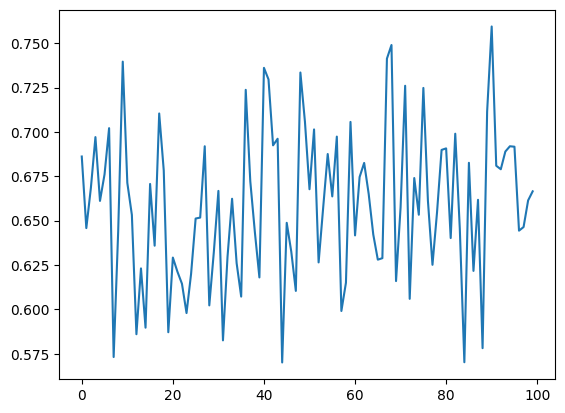

In [70]:
# 4.2 Plotting the losses

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)

/tmp/ipython-input-165561047.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + all_categories, rotation=90)
/tmp/ipython-input-165561047.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + all_categories)


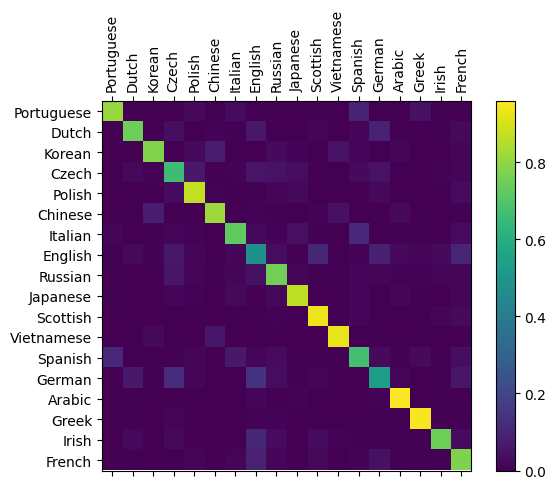

In [71]:
# 4.3. Evaluating the results

# - Plotting the confusion matrix

# Keep track of correct guesses in a confusion matrix
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

# Just return an output given a line
def evaluate(line_tensor):
    hidden = rnn.initHidden()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    return output

# Go through a bunch of examples and record which are correctly guessed
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate(line_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = all_categories.index(category)
    confusion[category_i][guess_i] += 1

# Normalize by dividing every row by its sum
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# Set up axes
ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)

# Force label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# sphinx_gallery_thumbnail_number = 2
plt.show()

In [72]:
# 5. Making predictions (Exercise)

def predict(input_line, n_predictions=3):
    print('\n> %s' % input_line)
    with torch.no_grad():
        output = evaluate(lineToTensor(input_line))

        # Get top N categories
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []

        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            print('(%.2f) %s' % (value, all_categories[category_index]))
            predictions.append([value, all_categories[category_index]])

"""
TODO: Put in different names to get their predicted languages.
"""

# Completed TODO
predict('Dovesky')
predict('Jackson')
predict('Satoshi')
predict('Giovanni')
predict('Hernandez')
predict('Nguyen')
predict('Kowalski')
predict('Ivanov')


> Dovesky
(-0.76) Russian
(-1.15) Czech
(-1.65) English

> Jackson
(-0.03) Scottish
(-3.91) English
(-5.33) Russian

> Satoshi
(-0.08) Japanese
(-3.01) Italian
(-4.10) Arabic

> Giovanni
(-0.10) Italian
(-2.79) Russian
(-4.01) Japanese

> Hernandez
(-0.05) Spanish
(-3.66) Italian
(-4.46) German

> Nguyen
(-0.01) Vietnamese
(-5.47) English
(-6.79) Russian

> Kowalski
(-0.01) Polish
(-5.46) Russian
(-5.74) Czech

> Ivanov
(-0.01) Russian
(-5.70) Czech
(-5.96) English


In [73]:
predict('Aaron')


> Aaron
(-0.39) Arabic
(-2.62) Dutch
(-2.76) English
